In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/flower_images (2).zip" "/content/"

In [ ]:
import zipfile

zip_path = "/content/flower_images (2).zip"
extract_path = "/content/flower_images"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipped successfully!")


Unzipped successfully!


In [ ]:
data_dir = "/content/flower_images/flower_images"

In [ ]:
import os

data_dir = "/content/flower_images/flower_images"
classes = os.listdir(data_dir)

# Filter only directories (in case there are any unwanted files)
classes = [folder for folder in classes if os.path.isdir(os.path.join(data_dir, folder))]

print("Found classes:", classes)
print("Total classes:", len(classes))


Found classes: ['Test', 'Train']
Total classes: 2


In [ ]:
import os

dataset_path = "/content/flower_images"
total_images = 0

# Count images in all subfolders (including Train and Test directories)
for root, dirs, files in os.walk(dataset_path):
    total_images += len([f for f in files if f.lower().endswith(('jpg', 'png', 'jpeg', '.bmp', '.gif'))])

print("Total images in the dataset:", total_images)

Total images in the dataset: 5005


In [ ]:
train_path = "/content/flower_images/flower_images/Train"

test_path = "/content/flower_images/flower_images/Test"

=== TRAIN SET ===
Classes: ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']

Image Distribution per Class:
           Number of Images
Lotus                  1000
Sunflower              1000
Orchid                 1000
Tulip                  1000
Lilly                   999

Total Images in Train Set: 4999


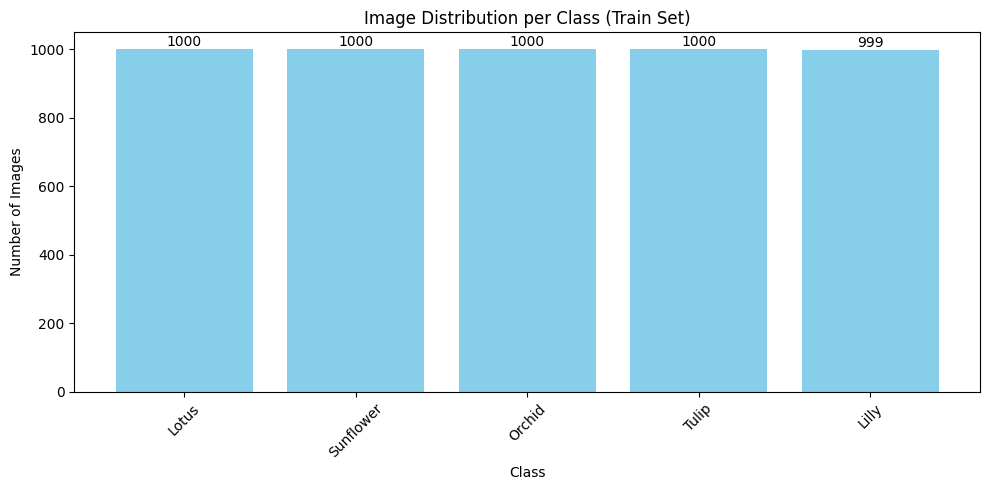

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set your dataset paths
train_path = "/content/flower_images/flower_images/Train"
test_path = "/content/flower_images/flower_images/Test"

def analyze_dataset(folder_path, set_name="Train"):
    """Analyze and visualize image distribution in a dataset folder"""
    # List all classes (subfolder names)
    classes = sorted(os.listdir(folder_path))
    print("Classes:", classes)

    # Count images per class
    class_counts = {}
    for class_name in classes:
        class_dir = os.path.join(folder_path, class_name)
        if os.path.isdir(class_dir):
            num_images = len([
                f for f in os.listdir(class_dir)
                if f.lower().endswith(('.jpg', '.jpeg', '.png'))
            ])
            class_counts[class_name] = num_images

    # Display as DataFrame
    df_counts = pd.DataFrame.from_dict(class_counts, orient='index',
                                     columns=['Number of Images'])
    df_counts = df_counts.sort_values(by='Number of Images', ascending=False)

    print("\nImage Distribution per Class:")
    print(df_counts)

    # Total images
    total_images = sum(class_counts.values())
    print("\nTotal Images in {} Set: {}".format(set_name, total_images))

    # Plot bar chart
    plt.figure(figsize=(10, 5))
    bars = plt.bar(df_counts.index, df_counts['Number of Images'], color='skyblue')
    plt.xticks(rotation=45)
    plt.title("Image Distribution per Class ({} Set)".format(set_name))
    plt.xlabel("Class")
    plt.ylabel("Number of Images")

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    return df_counts

# Analyze train set
print("=== TRAIN SET ===")
train_counts = analyze_dataset(train_path, "Train")


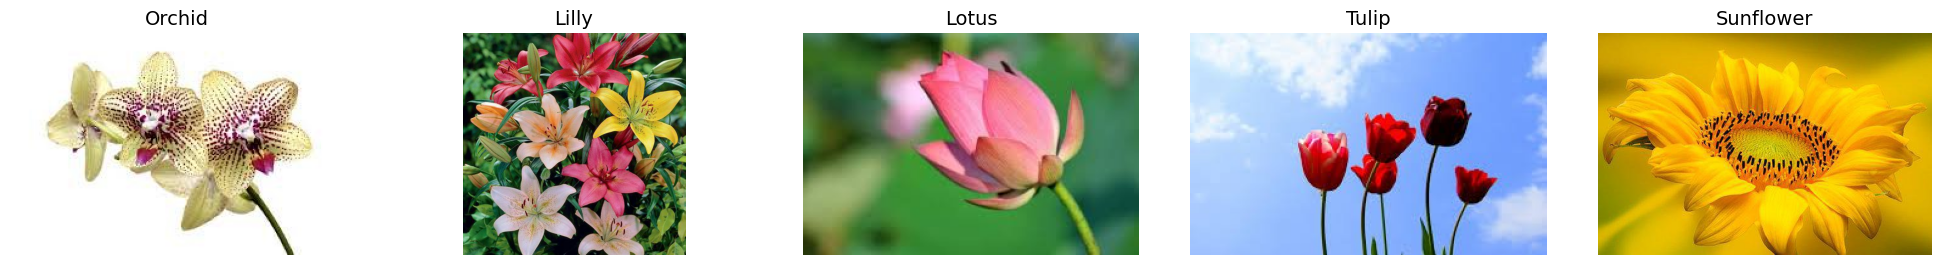

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# List of class folders
class_folders = [folder for folder in os.listdir(train_path)
                 if os.path.isdir(os.path.join(train_path, folder))]

# Set larger figure size
plt.figure(figsize=(20, len(class_folders) * 1.5))

# Loop through each class and display one random image
for i, cls in enumerate(class_folders):
    class_path = os.path.join(train_path, cls)
    image_list = os.listdir(class_path)

    if image_list:  # Avoid empty folders
        img_name = random.choice(image_list)
        img_path = os.path.join(class_path, img_name)
        img = mpimg.imread(img_path)

        plt.subplot(len(class_folders) // 2 + 1, 5, i + 1)  # 2 images per row
        plt.imshow(img)
        plt.title(cls, fontsize=14)
        plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
img_width, img_height = 180, 180
batch_size = 32

# Training Data Generator (with Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalization
    validation_split=0.2,    # 80-20 split
    rotation_range=20,       # Augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
# Training Set
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # 80% for training
)

# Validation Set
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # 20% for validation
)

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [ ]:
import shutil

# 1. Create image data generator for test set
test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalization

# 2. Create temporary directory structure
temp_test_dir = "/content/test_temp"
dummy_class = "test_images"
os.makedirs(os.path.join(temp_test_dir, dummy_class), exist_ok=True)

# 3. Move test images
for img_file in os.listdir(test_path):
    if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
        shutil.move(
            os.path.join(test_path, img_file),
            os.path.join(temp_test_dir, dummy_class, img_file)
        )

# 4. Create test generator
test_generator = test_datagen.flow_from_directory(
    temp_test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for correct evaluation
)

print(f"Found {test_generator.samples} test images")

Found 5 images belonging to 1 classes.
Found 5 test images


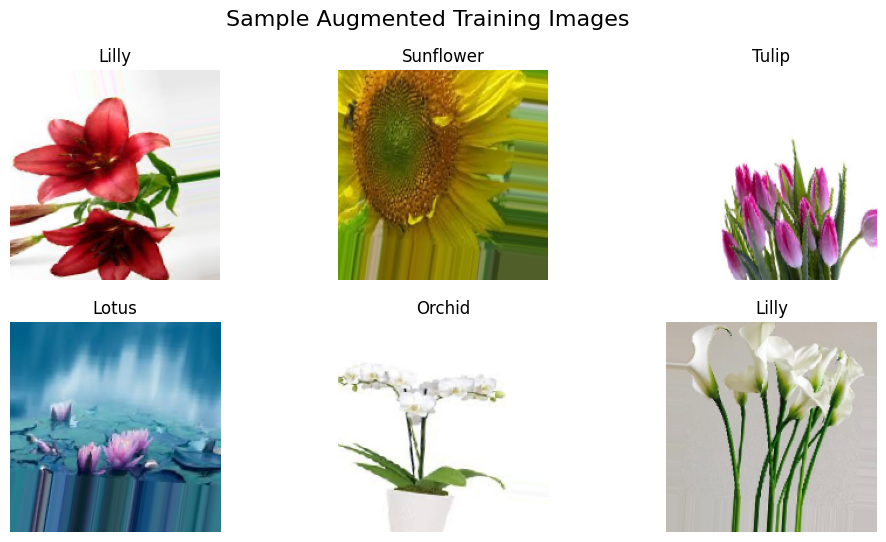

In [ ]:
# Get class names from train_generator
import numpy as np  # Import numpy and alias as np

class_indices = train_generator.class_indices         # {'Banana': 0, 'Cherry': 1, ...}
classes = list(class_indices.keys())                  # ['Banana', 'Cherry', ...]


# Visualize augmented images
sample_images, sample_labels = next(train_generator)
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(sample_images[i])
    plt.title(classes[np.argmax(sample_labels[i])]) # Now np is defined
    plt.axis('off')
plt.suptitle("Sample Augmented Training Images", fontsize=16)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Input

model = Sequential([

    Input(shape=(img_width, img_height, 3)),

    # Conv Block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),

    # Conv Block 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Conv Block 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),

    # Output Layer (5 classes)
    Dense(5, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,473,029 (100.99 MB)

 Trainable params: 26,473,029 (100.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 2. Proper training setup
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 392s 3s/step - accuracy: 0.3567 - loss: 1.4545 - val_accuracy: 0.4630 - val_loss: 1.2403
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 396s 3s/step - accuracy: 0.5169 - loss: 1.1687 - val_accuracy: 0.5250 - val_loss: 1.1867
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 389s 3s/step - accuracy: 0.5577 - loss: 1.1041 - val_accuracy: 0.5720 - val_loss: 1.0469
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 387s 3s/step - accuracy: 0.5859 - loss: 1.0276 - val_accuracy: 0.5850 - val_loss: 1.0275
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 442s 3s/step - accuracy: 0.6133 - loss: 0.9715 - val_accuracy: 0.6160 - val_loss: 0.9992
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 384s 3s/step - accuracy: 0.6340 - loss: 0.9297 - val_accuracy: 0.6440 - val_loss: 0.9308
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 386s 3s/step - accuracy: 0.6444 - loss: 0.9002 - val_accuracy: 0.6170 - val_loss: 0.9583
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 451s 3s/step - accuracy: 0.6540 - loss: 0.8745 - val_accu

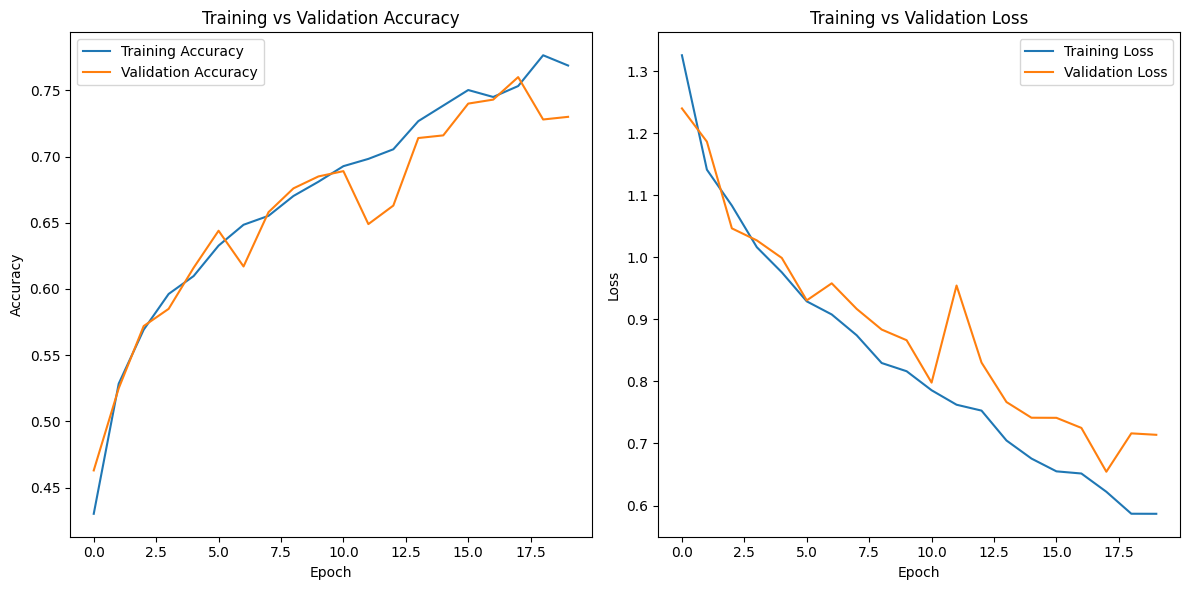

In [ ]:
# Plot the Training vs Validation Loss Curves and Training vs Validation Accuracy Curves

plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Print key metrics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
gap = abs(final_train_acc - final_val_acc)

print(f"Final Training Accuracy: {final_train_acc*100:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc*100:.2f}%")
print(f"Accuracy Gap: {gap*100:.2f}%")
print(f"Last Loss: {history.history['loss'][-1]:.4f}")
print(f"Last Val Loss: {history.history['val_loss'][-1]:.4f}")

Final Training Accuracy: 76.88%
Final Validation Accuracy: 73.00%
Accuracy Gap: 3.87%
Last Loss: 0.5866
Last Val Loss: 0.7140


In [ ]:
from sklearn.metrics import classification_report


# Get predictions on the validation data
Y_pred = model.predict(validation_generator, steps=len(validation_generator))
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step
Classification Report:
              precision    recall  f1-score   support

       Lilly       0.18      0.17      0.18       200
       Lotus       0.17      0.20      0.19       200
      Orchid       0.24      0.23      0.23       200
   Sunflower       0.21      0.23      0.22       200
       Tulip       0.20      0.17      0.18       200

    accuracy                           0.20      1000
   macro avg       0.20      0.20      0.20      1000
weighted avg       0.20      0.20      0.20      1000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step

Image: Lily.jpg
True class: flower_images
Predicted: Lilly (47.6%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

Image: Lotus.jpg
True class: flower_images
Predicted: Lotus (63.7%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

Image: Sunflower.jpg
True class: flower_images
Predicted: Sunflower (100.0%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

Image: Orchid.jpg
True class: flower_images
Predicted: Orchid (53.1%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

Image: Tulip.jpg
True class: flower_images
Predicted: Lotus (94.3%)


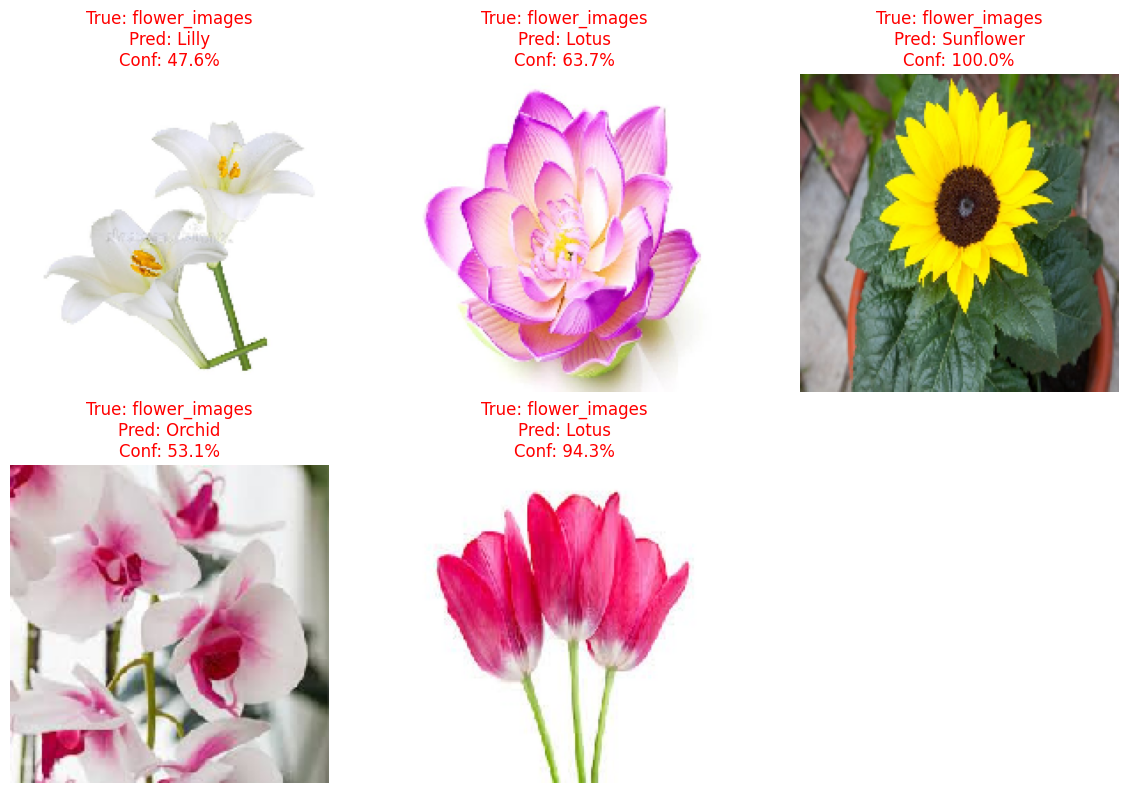

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_and_plot(image_paths, model, classes, img_width, img_height):
    """
    Perform inference on multiple images and plot results with confidence scores
    Args:
        image_paths: List of paths to test images
        model: Trained Keras model
        classes: List of class names
        img_width: Target image width
        img_height: Target image height
    """
    plt.figure(figsize=(12, 8))

    for i, img_path in enumerate(image_paths):
        # Load and preprocess image
        img = image.load_img(img_path, target_size=(img_width, img_height))
        img_array = np.expand_dims(image.img_to_array(img), axis=0) / 255.0

        # Get prediction
        preds = model.predict(img_array)[0]
        pred_class = classes[np.argmax(preds)]
        confidence = np.max(preds) * 100

        # Get true class from path (assuming structure: .../class_name/image.jpg)
        true_class = img_path.split('/')[-2] if '/' in img_path else "Unknown"

        # Plot the image with the result
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(f"True: {true_class}\nPred: {pred_class}\nConf: {confidence:.1f}%",
                  color='green' if pred_class == true_class else 'red')
        plt.axis('off')

        # Print prediction details
        print(f"\nImage: {img_path.split('/')[-1]}")
        print(f"True class: {true_class}")
        print(f"Predicted: {pred_class} ({confidence:.1f}%)")

    plt.tight_layout()
    plt.show()

# Example test images
# Example test images (Updated)
test_samples = [
    "/content/flower_images/flower_images/Lily.jpg",  # Corrected file name: Lilly.jpg (check your actual filenames)
    "/content/flower_images/flower_images/Lotus.jpg",
    "/content/flower_images/flower_images/Sunflower.jpg",
    "/content/flower_images/flower_images/Orchid.jpg",
    "/content/flower_images/flower_images/Tulip.jpg"
]


# Call the function
predict_and_plot(
    image_paths=test_samples,
    model=model,
    classes=classes,
    img_width=img_width,
    img_height=img_height
)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

deeper_model = Sequential([
    # Input layer
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), padding='same', input_shape=(img_width, img_height, 3)),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),

    # Conv Block 1
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),

    # Conv Block 2
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),

    # Fully connected layers
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile
deeper_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary
deeper_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 180, 180, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 180, 180, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 90, 90, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 90, 90, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 45, 45, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 45, 45, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    31,719,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,140,453 (122.61 MB)

 Trainable params: 32,140,005 (122.60 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Train with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_deeper = deeper_model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1350s 11s/step - accuracy: 0.2189 - loss: 32.5214 - val_accuracy: 0.2000 - val_loss: 3.1966
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1340s 11s/step - accuracy: 0.3182 - loss: 2.9426 - val_accuracy: 0.2410 - val_loss: 2.8284
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1345s 11s/step - accuracy: 0.3614 - loss: 2.5434 - val_accuracy: 0.2500 - val_loss: 2.6006
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1405s 11s/step - accuracy: 0.3938 - loss: 2.3024 - val_accuracy: 0.3730 - val_loss: 2.2691
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1357s 11s/step - accuracy: 0.3824 - loss: 2.1906 - val_accuracy: 0.2860 - val_loss: 2.3595
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1352s 11s/step - accuracy: 0.3926 - loss: 2.0505 - val_accuracy: 0.4430 - val_loss: 2.0133
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1348s 11s/step - accuracy: 0.4246 - loss: 1.9049 - val_accuracy: 0.4640 - val_loss: 1.8700
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1346s 11s/step - accuracy: 0.4394 - loss: 